# Lab 6

This lab connects all the pieces involved in training feed-forward fully connected neural networks. You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for both the MNIST and FASHION_MNIST datasets, and report your findings.

In [1]:
# Import the libraries we'll use below.
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

Label: t-shirt


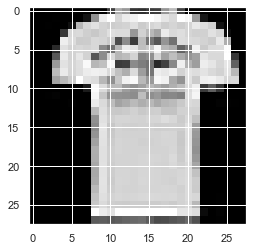

In [2]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
random.seed(0)
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

Label: 3


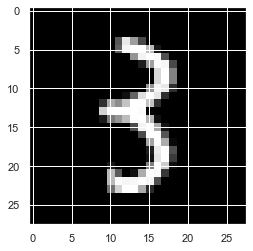

In [3]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Exercise 1 (58points)

Fill in code that implements the build_model function, including all the arguments listed in the function definition.

In [4]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.

    Args:
        n_classes: Number of output classes in the dataset.
        hidden_layer_sizes: A list with the number of units in each hidden layer.
        activation: The activation function to use for the hidden layers.
        optimizer: The optimizer to use (SGD, Adam).
        learning_rate: The desired learning rate for the optimizer.

    Returns:
        model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # YOUR CODE HERE
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Adding hidden layers
    i = 1
    for hidden_layer_size in hidden_layer_sizes:
        lay_name = 'Hidden_' + str(i)
        model.add(tf.keras.layers.Dense(units = hidden_layer_size,
                                        activation = activation,
                                        name = lay_name))
        print('Hidden Layer ' + str(i) + ' size: ' + str(hidden_layer_size))
        i += 1
        
    model.add(tf.keras.layers.Dense(units = n_classes,
                                    activation = 'softmax',
                                    name = 'Output'))
    
    print('Activation function: ' + activation)
    
    if optimizer == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate = learning_rate)
        print('Optimizer: SGD')
    elif optimizer == 'Adam':
        print('Optimizer: Adam')
        opt = keras.optimizers.Adam(learning_rate = learning_rate)
    else:
        opt = optimizer
        print('Optimizer: ' + optimizer)
    
    print('Learning Rate: ' + str(learning_rate))
        
    model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = opt, 
                  metrics = ['accuracy'])

    return model

---

## Run Experiments

We can now run a suite of experiments to see how the hyperparameters and layer sizes effect performance. The train_and_evaluate function below can be used to run experiments and retrieve results.

Data: digits
Activation function: tanh
Optimizer: Adam
Learning Rate: 0.01

Training...


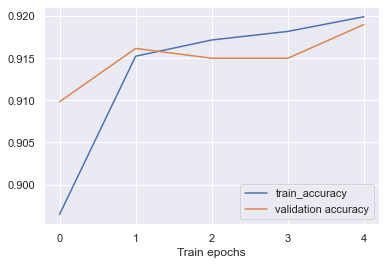

Test Accuracy: 0.9208


In [5]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  print('Data: ' + data)  
  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('\nTraining...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
    
  num_params = model.count_params() #GET PARAMETERS!
  
  return [test_accuracy, num_params]

print('Test Accuracy: %1.4f' 
      %train_and_evaluate()[0])

---
### Exercise 2 (8 points)

Run experiments and fill in the test results in the table below. Feel free to extend the table to more experiments as you see fit.

In [6]:
# Generating a Dataframe with all the experiments' information

exp_ind = ['Experiment_' + str(i) for i in range(1,11)]
data =['digits'] * 5 + ['fashion'] * 5
sizes = ([[]] * 3 + [[128]] + [[256 , 128]]) * 2
acts = (['tanh'] + ['relu'] * 4) * 2
opts = (['SGD'] * 2 + ['Adam'] * 3) * 2
rates = [0.01] * 10
accs = [0] * 10
params = [0] * 10

experiments_df = pd.DataFrame({'DATA': data, 
                               'HIDDEN SIZES': sizes, 
                               'ACTIVATION': acts, 
                               'OPTIMIZER': opts, 
                               'LEARNING RATE': rates, 
                               '# PARAMETERS': params, 
                               'TEST ACCURACY': accs}, 
                              index = exp_ind)

Experiment_1

Data: digits
Activation function: tanh
Optimizer: SGD
Learning Rate: 0.01

Training...


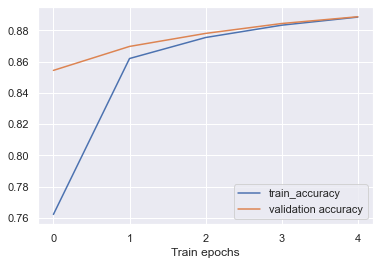

Test Accuracy: 0.8958


Experiment_2

Data: digits
Activation function: relu
Optimizer: SGD
Learning Rate: 0.01

Training...


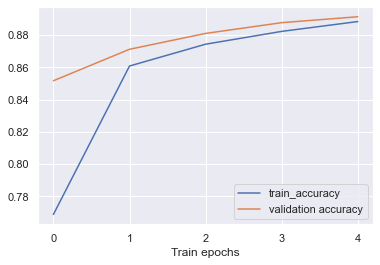

Test Accuracy: 0.8980


Experiment_3

Data: digits
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


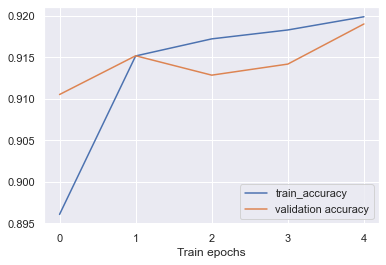

Test Accuracy: 0.9211


Experiment_4

Data: digits
Hidden Layer 1 size: 128
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


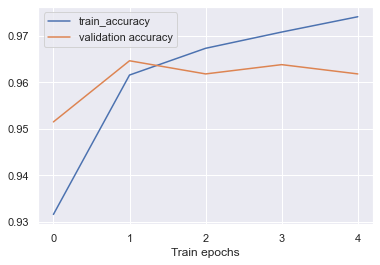

Test Accuracy: 0.9604


Experiment_5

Data: digits
Hidden Layer 1 size: 256
Hidden Layer 2 size: 128
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


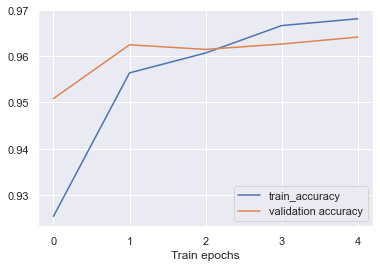

Test Accuracy: 0.9604


Experiment_6

Data: fashion
Activation function: tanh
Optimizer: SGD
Learning Rate: 0.01

Training...


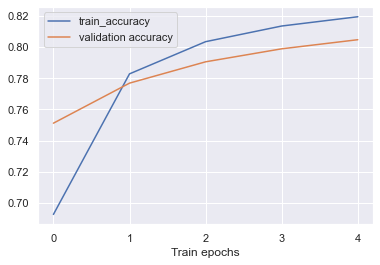

Test Accuracy: 0.8071


Experiment_7

Data: fashion
Activation function: relu
Optimizer: SGD
Learning Rate: 0.01

Training...


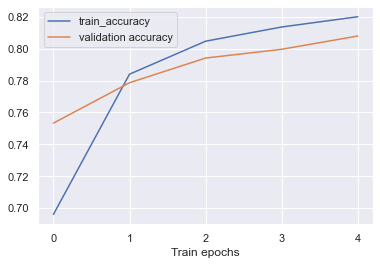

Test Accuracy: 0.8123


Experiment_8

Data: fashion
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


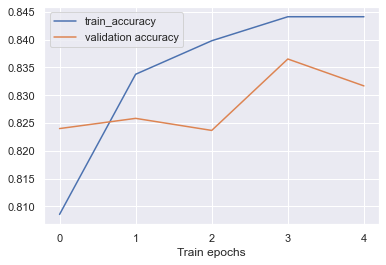

Test Accuracy: 0.8349


Experiment_9

Data: fashion
Hidden Layer 1 size: 128
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


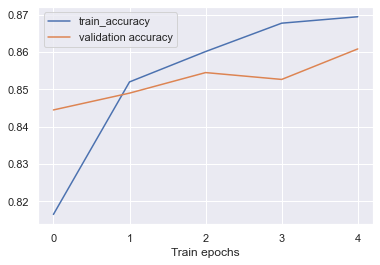

Test Accuracy: 0.8602


Experiment_10

Data: fashion
Hidden Layer 1 size: 256
Hidden Layer 2 size: 128
Activation function: relu
Optimizer: Adam
Learning Rate: 0.01

Training...


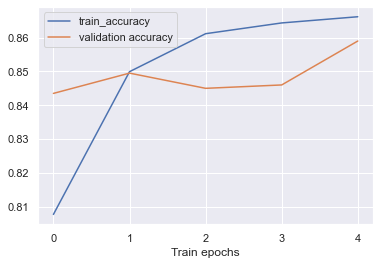

Test Accuracy: 0.8597




In [7]:
accs = []*10

for i in range (1,11):
    print('Experiment_' + str(i) + '\n')
    accu, param = train_and_evaluate(data = experiments_df.loc['Experiment_' + str(i), 'DATA'], 
                                     hidden_layer_sizes = experiments_df.loc['Experiment_' + str(i), 'HIDDEN SIZES'], 
                                     activation = experiments_df.loc['Experiment_' + str(i), 'ACTIVATION'], 
                                     optimizer = experiments_df.loc['Experiment_' + str(i), 'OPTIMIZER'], 
                                     learning_rate = experiments_df.loc['Experiment_' + str(i), 'LEARNING RATE'])
    
    experiments_df.loc['Experiment_' + str(i), '# PARAMETERS'] = param
    experiments_df.loc['Experiment_' + str(i), 'TEST ACCURACY'] = accu
    
    print('Test Accuracy: %1.4f' % accu + '\n\n')

#### Student Solution

In [8]:
experiments_df

,DATA,HIDDEN SIZES,ACTIVATION,OPTIMIZER,LEARNING RATE,# PARAMETERS,TEST ACCURACY
Experiment_1,digits,[],tanh,SGD,0.01,7850,0.8958
Experiment_2,digits,[],relu,SGD,0.01,7850,0.8980
Experiment_3,digits,[],relu,Adam,0.01,7850,0.9211
Experiment_4,digits,[128],relu,Adam,0.01,101770,0.9604
Experiment_5,digits,"[256, 128]",relu,Adam,0.01,235146,0.9604
Experiment_6,fashion,[],tanh,SGD,0.01,7850,0.8071
Experiment_7,fashion,[],relu,SGD,0.01,7850,0.8123
Experiment_8,fashion,[],relu,Adam,0.01,7850,0.8349
Experiment_9,fashion,[128],relu,Adam,0.01,101770,0.8602
Experiment_10,fashion,"[256, 128]",relu,Adam,0.01,235146,0.8597
